In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras import Sequential
from keras.layers import Dense 
from keras.regularizers import L1,L2,L1L2
from keras.optimizers import SGD


from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\Data Science Innomatics\DS written notes\Deep_learning\DL_Assignments\Multiple CSV\8.twospirals.csv", header = None)
df.head()

,0,1,2
0,-2.543456,-10.816358,0
1,9.434466,-2.572000,0
2,3.368646,-10.194671,0
3,1.341407,-4.204140,0
4,9.547758,-2.220580,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2000 non-null   float64
 1   1       2000 non-null   float64
 2   2       2000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


In [4]:
x=df[[0,1]] 
y=df[2].astype(int) 

<AxesSubplot:xlabel='0', ylabel='1'>

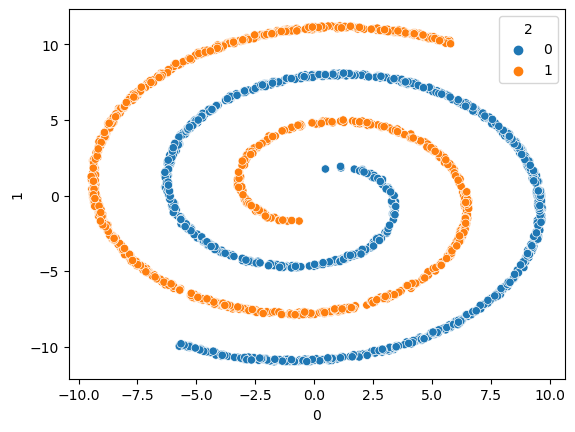

In [5]:
sns.scatterplot(data = df, x=0,y=1, hue = 2)

In [6]:
df[2].value_counts()

0    1000
1    1000
Name: 2, dtype: int64

<AxesSubplot:xlabel='1'>

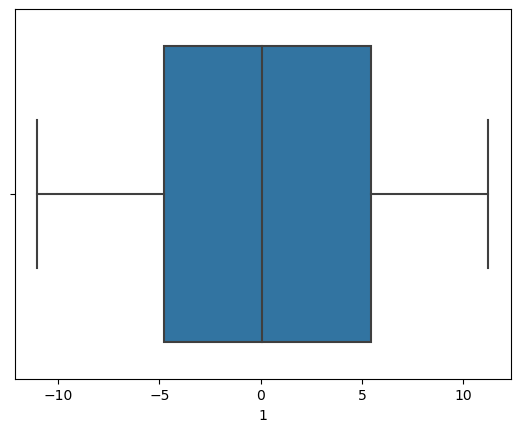

In [7]:
sns.boxplot(data = df, x = 1)

<AxesSubplot:xlabel='0'>

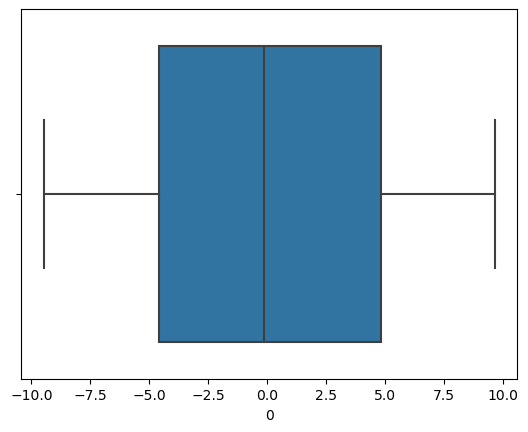

In [8]:
sns.boxplot(data = df, x = 0)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [10]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1600, 2) (400, 2) (1600,) (400,)


In [11]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)  

In [12]:
model=Sequential()
model.add(Dense(16,activation="relu",input_dim=2))
model.add(Dense(10,activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(1,activation="sigmoid")) 

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 291 (1.14 KB)
Trainable params: 291 (1.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(x_train,y_train,batch_size=50,epochs=500,validation_split=0.1)  

Epoch 1/500
29/29 [==============================] - 1s 10ms/step - loss: 0.8112 - accuracy: 0.4792 - val_loss: 0.8052 - val_accuracy: 0.4563
Epoch 2/500
29/29 [==============================] - 0s 4ms/step - loss: 0.7577 - accuracy: 0.4583 - val_loss: 0.7598 - val_accuracy: 0.4563
Epoch 3/500
29/29 [==============================] - 0s 4ms/step - loss: 0.7341 - accuracy: 0.4458 - val_loss: 0.7385 - val_accuracy: 0.4625
Epoch 4/500
29/29 [==============================] - 0s 4ms/step - loss: 0.7222 - accuracy: 0.4639 - val_loss: 0.7265 - val_accuracy: 0.4688
Epoch 5/500
29/29 [==============================] - 0s 4ms/step - loss: 0.7141 - accuracy: 0.4924 - val_loss: 0.7179 - val_accuracy: 0.4750
Epoch 6/500
29/29 [==============================] - 0s 4ms/step - loss: 0.7088 - accuracy: 0.5007 - val_loss: 0.7132 - val_accuracy: 0.4688
Epoch 7/500
29/29 [==============================] - 0s 4ms/step - loss: 0.7054 - accuracy: 0.5069 - val_loss: 0.7096 - val_accuracy: 0.4563
Epoch 8/500


Epoch 59/500
29/29 [==============================] - 0s 4ms/step - loss: 0.6296 - accuracy: 0.6653 - val_loss: 0.6630 - val_accuracy: 0.6125
Epoch 60/500
29/29 [==============================] - 0s 5ms/step - loss: 0.6288 - accuracy: 0.6681 - val_loss: 0.6623 - val_accuracy: 0.6125
Epoch 61/500
29/29 [==============================] - 0s 4ms/step - loss: 0.6280 - accuracy: 0.6687 - val_loss: 0.6620 - val_accuracy: 0.6125
Epoch 62/500
29/29 [==============================] - 0s 4ms/step - loss: 0.6273 - accuracy: 0.6674 - val_loss: 0.6616 - val_accuracy: 0.6125
Epoch 63/500
29/29 [==============================] - 0s 4ms/step - loss: 0.6265 - accuracy: 0.6660 - val_loss: 0.6609 - val_accuracy: 0.6125
Epoch 64/500
29/29 [==============================] - 0s 4ms/step - loss: 0.6258 - accuracy: 0.6687 - val_loss: 0.6606 - val_accuracy: 0.6125
Epoch 65/500
29/29 [==============================] - 0s 4ms/step - loss: 0.6252 - accuracy: 0.6660 - val_loss: 0.6601 - val_accuracy: 0.6125
Epoch 

29/29 [==============================] - 0s 4ms/step - loss: 0.5974 - accuracy: 0.6653 - val_loss: 0.6330 - val_accuracy: 0.5938
Epoch 174/500
29/29 [==============================] - 0s 5ms/step - loss: 0.5971 - accuracy: 0.6653 - val_loss: 0.6323 - val_accuracy: 0.5938
Epoch 175/500
29/29 [==============================] - 0s 4ms/step - loss: 0.5966 - accuracy: 0.6674 - val_loss: 0.6319 - val_accuracy: 0.5938
Epoch 176/500
29/29 [==============================] - 0s 4ms/step - loss: 0.5963 - accuracy: 0.6653 - val_loss: 0.6312 - val_accuracy: 0.5938
Epoch 177/500
29/29 [==============================] - 0s 5ms/step - loss: 0.5959 - accuracy: 0.6653 - val_loss: 0.6309 - val_accuracy: 0.5938
Epoch 178/500
29/29 [==============================] - 0s 3ms/step - loss: 0.5955 - accuracy: 0.6646 - val_loss: 0.6304 - val_accuracy: 0.5938
Epoch 179/500
29/29 [==============================] - 0s 4ms/step - loss: 0.5950 - accuracy: 0.6667 - val_loss: 0.6303 - val_accuracy: 0.5938
Epoch 180/500

29/29 [==============================] - 0s 4ms/step - loss: 0.4076 - accuracy: 0.7229 - val_loss: 0.4316 - val_accuracy: 0.6562
Epoch 288/500
29/29 [==============================] - 0s 4ms/step - loss: 0.4040 - accuracy: 0.7208 - val_loss: 0.4289 - val_accuracy: 0.6500
Epoch 289/500
29/29 [==============================] - 0s 4ms/step - loss: 0.4006 - accuracy: 0.7194 - val_loss: 0.4245 - val_accuracy: 0.6625
Epoch 290/500
29/29 [==============================] - 0s 4ms/step - loss: 0.3973 - accuracy: 0.7222 - val_loss: 0.4208 - val_accuracy: 0.6687
Epoch 291/500
29/29 [==============================] - 0s 4ms/step - loss: 0.3939 - accuracy: 0.7326 - val_loss: 0.4170 - val_accuracy: 0.6875
Epoch 292/500
29/29 [==============================] - 0s 4ms/step - loss: 0.3906 - accuracy: 0.7375 - val_loss: 0.4140 - val_accuracy: 0.6875
Epoch 293/500
29/29 [==============================] - 0s 4ms/step - loss: 0.3870 - accuracy: 0.7451 - val_loss: 0.4103 - val_accuracy: 0.6875
Epoch 294/500

29/29 [==============================] - 0s 4ms/step - loss: 0.1874 - accuracy: 0.9250 - val_loss: 0.1945 - val_accuracy: 0.9438
Epoch 402/500
29/29 [==============================] - 0s 4ms/step - loss: 0.1860 - accuracy: 0.9250 - val_loss: 0.1942 - val_accuracy: 0.9438
Epoch 403/500
29/29 [==============================] - 0s 4ms/step - loss: 0.1849 - accuracy: 0.9250 - val_loss: 0.1919 - val_accuracy: 0.9438
Epoch 404/500
29/29 [==============================] - 0s 4ms/step - loss: 0.1835 - accuracy: 0.9257 - val_loss: 0.1912 - val_accuracy: 0.9438
Epoch 405/500
29/29 [==============================] - 0s 4ms/step - loss: 0.1824 - accuracy: 0.9257 - val_loss: 0.1891 - val_accuracy: 0.9438
Epoch 406/500
29/29 [==============================] - 0s 4ms/step - loss: 0.1810 - accuracy: 0.9257 - val_loss: 0.1876 - val_accuracy: 0.9438
Epoch 407/500
29/29 [==============================] - 0s 4ms/step - loss: 0.1799 - accuracy: 0.9264 - val_loss: 0.1884 - val_accuracy: 0.9438
Epoch 408/500

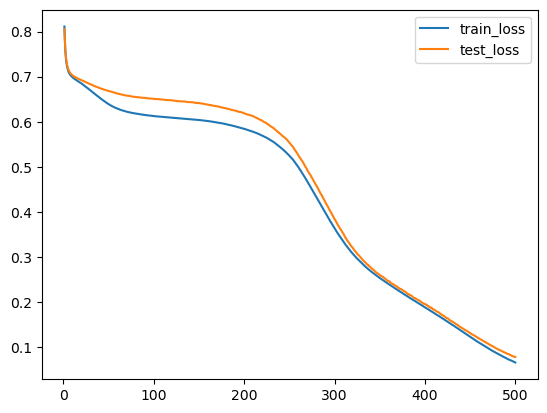

In [15]:
plt.plot(range(1,501),history.history["loss"],label="train_loss")
plt.plot(range(1,501),history.history["val_loss"],label="test_loss") 
plt.legend()

In [16]:
predicted=model.predict(x_test) 
predicted 

13/13 [==============================] - 0s 3ms/step


array([[0.0016495 ],
       [0.99150497],
       [0.99226797],
       [0.00203575],
       [0.7873678 ],
       [0.99771684],
       [0.9582738 ],
       [0.9985678 ],
       [0.9982274 ],
       [0.09969289],
       [0.9979824 ],
       [0.993016  ],
       [0.09977533],
       [0.00535242],
       [0.00217759],
       [0.9568363 ],
       [0.01381654],
       [0.9920895 ],
       [0.99712574],
       [0.31228763],
       [0.99039173],
       [0.98856384],
       [0.00269308],
       [0.9996523 ],
       [0.9607397 ],
       [0.9940449 ],
       [0.00211976],
       [0.9723868 ],
       [0.09576413],
       [0.9911525 ],
       [0.99547964],
       [0.9880274 ],
       [0.99842656],
       [0.9983684 ],
       [0.8287397 ],
       [0.00484228],
       [0.9928526 ],
       [0.10083859],
       [0.00288411],
       [0.00471707],
       [0.29058367],
       [0.9627373 ],
       [0.9935198 ],
       [0.11338878],
       [0.99908   ],
       [0.00146006],
       [0.12783824],
       [0.002

In [17]:
predicted=np.where(predicted>0.5,1,0)
predicted  

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
    

# Evaluating model

0.985


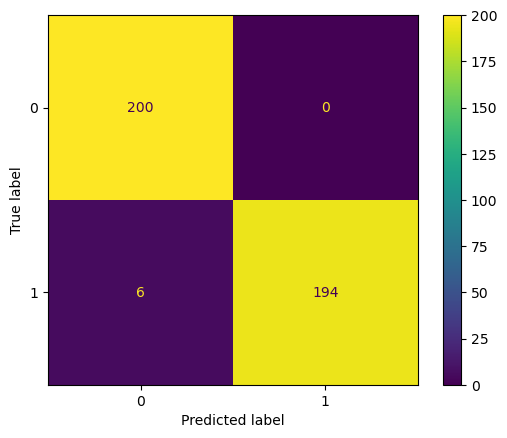

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show() 

9600/9600 [==============================] - 17s 2ms/step


<AxesSubplot:>

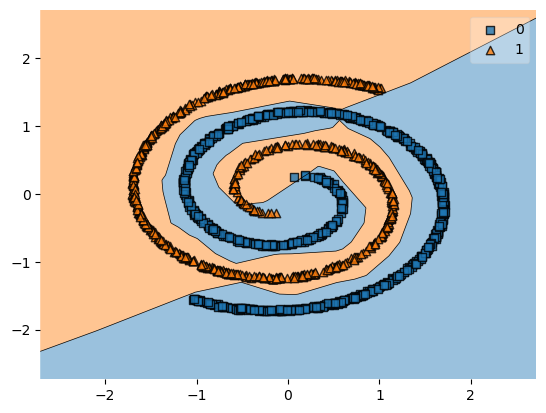

In [19]:
plot_decision_regions(x_train,y_train.values,clf=model)

9600/9600 [==============================] - 16s 2ms/step


<AxesSubplot:>

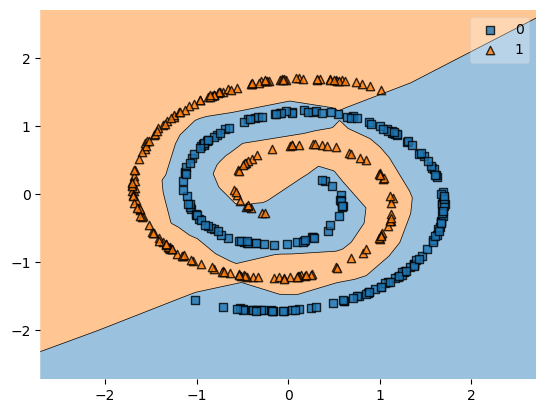

In [20]:
plot_decision_regions(x_test,y_test.values,clf=model)  